11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7684 - loss: 0.7197 - val_accuracy: 0.9612 - val_loss: 0.1324
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9538 - loss: 0.1611 - val_accuracy: 0.9710 - val_loss: 0.0977
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9667 - loss: 0.1126 - val_accuracy: 0.9716 - val_loss: 0.0981
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9735 - loss: 0.0883 - val_accuracy: 0.9743 - val_loss: 0.0892
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9766 - loss: 0.0749 - val_accuracy: 0.9776 - val_loss: 0.0817
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9819 - loss: 0.0599 - val_accuracy: 0.9783 - val_loss: 0.0808
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9864 - loss: 0.0480 - val_accuracy: 0.9771 - val_loss: 0.0839
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9861 - loss: 0.0454 - val_accuracy: 0.

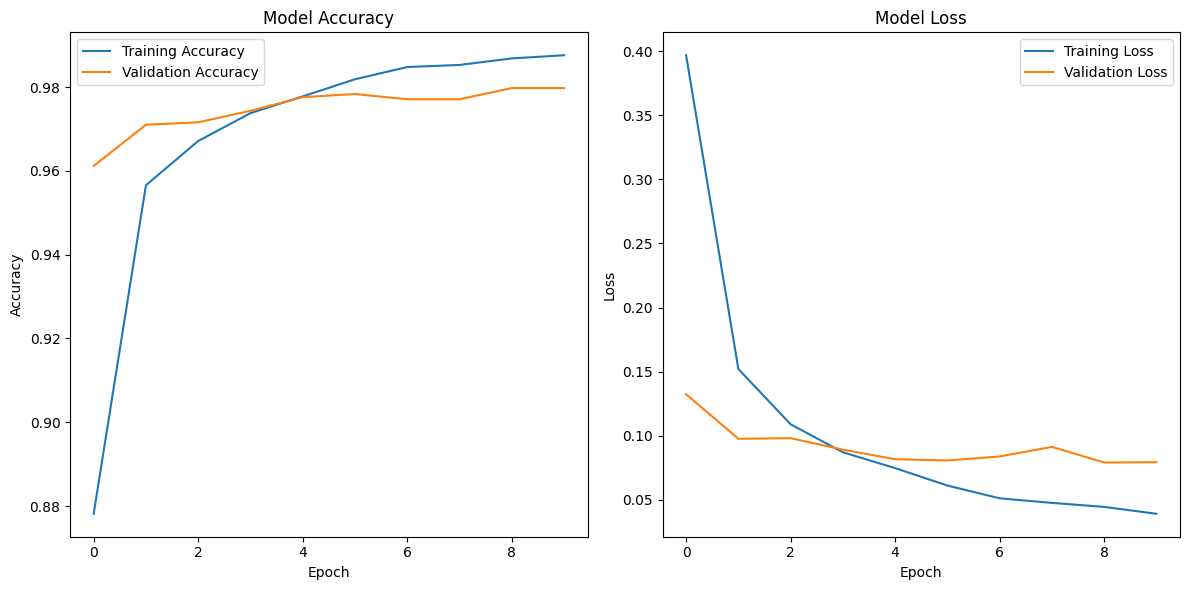

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0
# Flatten the images (28x28 to 784) and convert labels to one-hot encoding
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Build the neural network with dropout layers
model = Sequential([
Dense(512, activation='relu', input_shape=(28 * 28,)), # First hidden layer
Dropout(0.2), # Dropout with 20% probability
Dense(256, activation='relu'), # Second hidden layer
Dropout(0.3), # Dropout with 30% probability
Dense(128, activation='relu'), # Third hidden layer
Dropout(0.4), # Dropout with 40% probability
Dense(10, activation='softmax') # Output layer for 10 classes
])
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train,epochs=10,batch_size=128,validation_split=0.2)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
# Plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()